In [177]:
import numpy as np
from data import Lattice, Catalogue, elasticity_func
from utils import plotting
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cat = Catalogue.from_file('./filt_wind.lat', 0)
cat

Unit cell catalogue with 8301 entries

In [14]:
df = pd.DataFrame(cat)
# df['num_edges'] = df['edge_adjacency'].apply(len)
# df['num_nodes'] = df['nodal_positions'].apply(len)
df['num_edges'] = df['fundamental_edge_adjacency'].apply(len)
df['num_nodes'] = df['fundamental_edge_adjacency'].apply(lambda x: len(np.unique(x)))
df.head()

,name,lattice_constants,nodal_positions,edge_adjacency,fundamental_edge_adjacency,fundamental_tesselation_vecs,num_edges,num_nodes
0,cub_Z06.0_E1,"[1.0, 1.0, 1.0, 90.0, 90.0, 90.0]","[[0.0, 0.77636, 0.18995], [0.5235, 0.0, 0.1899...","[[0, 3], [1, 3], [2, 3], [3, 4], [3, 5], [3, 6]]","[[3, 3], [3, 3], [3, 3]]","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....",3,1
1,ort_Z08.0_E2,"[0.85075, 0.57449, 1.0, 90.0, 90.0, 90.0]","[[0.0, 0.03354, 0.01299], [0.0, 0.08461, 0.012...","[[0, 3], [1, 9], [2, 5], [4, 5], [5, 7], [5, 9...","[[9, 5], [9, 9], [9, 5], [5, 9], [5, 9], [9, 9]]","[[0.0, 0.0, 0.0, 1.0, -1.0, 0.0], [0.0, 0.0, 0...",6,2
2,cub_Z08.0_E3,"[1.0, 1.0, 1.0, 90.0, 90.0, 90.0]","[[0.0, 0.04173, 0.28413], [0.0, 0.04173, 0.610...","[[0, 4], [1, 5], [2, 8], [3, 8], [6, 8], [7, 8...","[[17, 8], [17, 8], [17, 8], [17, 8], [8, 17], ...","[[0.0, 0.0, 0.0, 1.0, -1.0, 1.0], [0.0, 0.0, 0...",8,2
3,hex_Z08.0_E4,"[0.99471, 0.99471, 1.0, 90.0, 90.0, 120.0]","[[0.0, 0.13048, 0.86004], [0.0, 0.43332, 0.860...","[[0, 4], [1, 4], [2, 4], [3, 4], [4, 5], [4, 6...","[[4, 4], [4, 4], [4, 4], [4, 4]]","[[0.0, 0.0, 0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0....",4,1
4,tet_Z04.0_E5,"[0.503, 0.503, 1.0, 90.0, 90.0, 90.0]","[[0.0, 0.68023, 0.15914], [0.11139, 0.0, 0.659...","[[0, 3], [1, 4], [2, 3], [3, 4], [3, 7], [4, 5...","[[3, 3], [4, 4], [4, 3], [3, 4]]","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....",4,2


In [6]:
df.describe()

,num_edges,num_nodes
count,8301.000000,8301.000000
mean,51.428141,23.600891
std,51.274866,25.556775
min,3.000000,1.000000
25%,22.000000,9.000000
50%,36.000000,16.000000
75%,64.000000,28.000000
max,816.000000,384.000000


By using fundamental representation, the number of nodes in a resulting graph is reducing.

In [20]:
# fig = go.Figure()
# fig = make_subplots(
#     rows=1, cols=2, 
#     subplot_titles=("Number of nodes", "Number of edges", "Fundamental nodes", "Fundamental edges")
# )
marker_dict = {'line':{'color':'black', 'width':0.5}}

filt = (df['num_nodes']<200) & (df['num_edges']<200)
# fig.add_histogram(
#     x=df['num_nodes'], histnorm='probability density',
#     name='Nodes', marker=marker_dict
# )
# fig.add_histogram(
#     x=df['num_edges'], histnorm='probability density',
#     name='Edges', marker=marker_dict, 
# )

fig = px.histogram(df.loc[filt,:], x='num_nodes',nbins=50)

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
# fig.update_layout(xaxis_range=[0,250])
fig.update_layout(title='Unit cell statistics')
fig

In [18]:
nums = np.concatenate((df['num_nodes'].to_numpy(), df['num_edges'].to_numpy()))
cls = np.concatenate((['nodes']*len(df['num_nodes'].to_numpy()), ['edges']*len(df['num_edges'].to_numpy())))
dfplot = pd.DataFrame({'nums':nums, 'cls':cls})
dfplot

,nums,cls
0,1,nodes
1,2,nodes
2,2,nodes
3,1,nodes
4,2,nodes
...,...,...
16597,104,edges
16598,36,edges
16599,36,edges
16600,84,edges


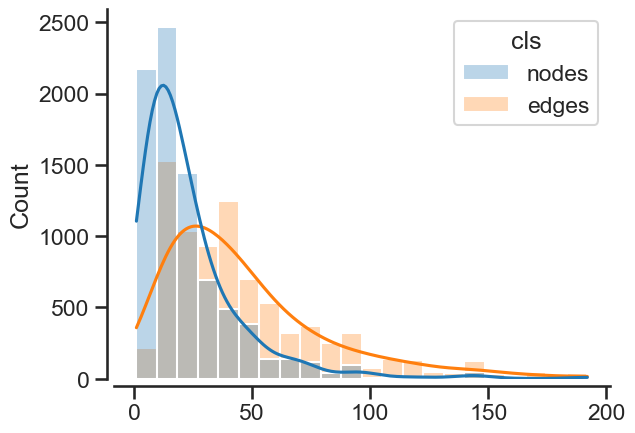

In [58]:
sns.set_style("ticks")
sns.set_context("talk")
ax = sns.histplot(dfplot[dfplot['nums']<200], x='nums', hue='cls', kde=True, kde_kws={'bw_adjust':2}, bins='doane', alpha=0.3, legend=True)
ax.set_xlabel('')
sns.despine(offset=5,)
plt.savefig('fig1.svg')

# Imperfection data

In [63]:
cat = Catalogue.from_file('C:/temp/gnn-paper-data/dset_6000.lat', 0)

In [64]:
df = pd.DataFrame(cat)
df.head()

,name,base_name,imperfection_level,imperfection_kind,nodal_hash,lattice_constants,nodal_positions,edge_adjacency,fundamental_edge_adjacency,fundamental_tesselation_vecs,compliance_tensors
0,ort_Z04.7_E151_p_0.03_3544304756803006502,ort_Z04.7_E151,0.03,sphere_surf,3544304756803006502,"[0.22996, 0.35291, 1.0, 90.0, 90.0, 90.0]","[[0.0, 0.70595, 0.45946], [0.0, 0.72275, 0.256...","[[0, 2], [1, 2], [2, 4], [2, 9], [3, 4], [4, 5...","[[9, 2], [4, 2], [2, 4], [2, 9], [4, 4], [4, 1...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","{0.01025: [[3961.9, -0.81296, -355.3, -213.68,..."
1,ort_Z06.9_E401_p_0.03_-7646635438400865665,ort_Z06.9_E401,0.03,sphere_surf,-7646635438400865665,"[0.5953, 1.0, 0.49005, 90.0, 90.0, 90.0]","[[0.0, 0.2462, 0.53089], [0.0, 0.43338, 0.5430...","[[0, 5], [1, 8], [2, 8], [3, 13], [4, 5], [5, ...","[[32, 5], [32, 8], [33, 8], [33, 13], [5, 5], ...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","{0.01052: [[4178.9, -750.36, 0.35771, 181.36, ..."
2,ort_Z04.8_E180_p_0.03_-4582899278851655373,ort_Z04.8_E180,0.03,sphere_surf,-4582899278851655373,"[0.36919, 0.73554, 1.0, 90.0, 90.0, 90.0]","[[0.0, 0.33887, 0.24812], [0.0, 0.84923, 0.269...","[[0, 9], [1, 6], [2, 3], [4, 5], [5, 6], [5, 8...","[[9, 9], [12, 6], [12, 5], [5, 6], [5, 12], [6...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","{0.011: [[712.12, 2.4765e-06, -158.55, 3.6617,..."
3,ort_Z06.0_E384_p_0.03_-7495255212302931801,ort_Z06.0_E384,0.03,sphere_surf,-7495255212302931801,"[0.63227, 1.0, 0.56599, 90.0, 90.0, 90.0]","[[0.0, 0.19317, 0.76947], [0.0, 0.1943, 0.0345...","[[0, 10], [1, 7], [2, 7], [3, 5], [4, 5], [5, ...","[[10, 10], [10, 7], [10, 7], [13, 5], [5, 5], ...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","{0.003018: [[987.82, -0.027669, -452.19, 2.913..."
4,ort_Z04.0_E187_p_0.03_2373454563857206123,ort_Z04.0_E187,0.03,sphere_surf,2373454563857206123,"[1.0, 0.67209, 0.5617, 90.0, 90.0, 90.0]","[[0.0, 0.05131, 0.70354], [0.0, 0.55535, 0.081...","[[0, 2], [1, 5], [2, 3], [2, 5], [2, 11], [4, ...","[[23, 2], [20, 5], [2, 5], [2, 5], [2, 11], [5...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","{0.001816: [[1949700.0, 596.32, -1877500.0, -1..."


In [65]:
df['num_edges'] = df['fundamental_edge_adjacency'].apply(len)
df['num_nodes'] = df['fundamental_edge_adjacency'].apply(lambda x: len(np.unique(x)))

In [172]:
df.sample()

,name,base_name,imperfection_level,imperfection_kind,nodal_hash,lattice_constants,nodal_positions,edge_adjacency,fundamental_edge_adjacency,fundamental_tesselation_vecs,compliance_tensors,num_edges,num_nodes
23352,cub_Z07.0_E13067_p_0.03_-2212992665862842131,cub_Z07.0_E13067,0.03,sphere_surf,-2212992665862842131,"[1.0, 1.0, 1.0, 90.0, 90.0, 90.0]","[[0.0, 0.09191, 0.33486], [0.0, 0.11336, 0.887...","[[0, 30], [1, 53], [2, 28], [3, 34], [4, 40], ...","[[132, 30], [138, 53], [146, 41], [146, 53], [...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....","{0.009874: [[987.07, -105.13, -111.35, 60.928,...",168,48


In [69]:
df.iloc[3614]

name                                    tet_Z04.0_E466_p_0.03_4251629384132856742
base_name                                                          tet_Z04.0_E466
imperfection_level                                                           0.03
imperfection_kind                                                     sphere_surf
nodal_hash                                                    4251629384132856742
lattice_constants                           [1.0, 1.0, 0.33304, 90.0, 90.0, 90.0]
nodal_positions                 [[0.0, 0.80912, 0.95387], [0.05822, 0.81282, 0...
edge_adjacency                  [[0, 2], [1, 2], [2, 3], [2, 4], [4, 6], [4, 9...
fundamental_edge_adjacency      [[14, 2], [2, 2], [2, 4], [4, 6], [4, 11], [4,...
fundamental_tesselation_vecs    [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0....
compliance_tensors              {0.004509: [[1940.8, 0.10948, -0.13157, -70.66...
num_edges                                                                      10
num_nodes       

In [183]:
data = df.iloc[3614].to_dict()
data.pop('fundamental_edge_adjacency')
data.pop('fundamental_tesselation_vecs')
print(data['num_edges'])
print(data['num_nodes'])
lat = Lattice(**data)
lt = lat.create_tesselated(2,2,2)
fig = plotting.plotly_unit_cell_3d(lt, repr='fundamental', coords='transformed')
# fig.update_traces(line_color="RoyalBlue")
fig.update_layout(width=800, height=800)

10
5


In [179]:
rd, S = lat.compliance_tensors.popitem()
S = elasticity_func.compliance_Voigt_to_4th_order(S)
fig = plotting.plotly_elasticity_surf(S)
fig.update_layout(width=800, height=800)

In [182]:
data = df.iloc[23352].to_dict()
print(data['num_edges'])
print(data['num_nodes'])
data.pop('fundamental_edge_adjacency')
data.pop('fundamental_tesselation_vecs')
lat = Lattice(**data)
lt = lat.create_tesselated(2,2,2)
fig = plotting.plotly_unit_cell_3d(lt, repr='fundamental', coords='transformed')
fig.update_layout(width=800, height=800)

168
48


In [181]:
rd, S = lat.compliance_tensors.popitem()
S = elasticity_func.compliance_Voigt_to_4th_order(S)
fig = plotting.plotly_elasticity_surf(S)
fig.update_layout(width=800, height=800)

In [204]:
i=np.random.randint(df.shape[0])
data = df.iloc[i].to_dict()
print(data['num_edges'])
print(data['num_nodes'])
data.pop('fundamental_edge_adjacency')
data.pop('fundamental_tesselation_vecs')
lat = Lattice(**data)
fig = plotting.plotly_unit_cell_3d(lat, repr='fundamental', coords='transformed')
# fig.update_traces()
fig.update_layout(width=800, height=800)
col = 'rgba(200,200,200,1)'
color = {'backgroundcolor':col,'showgrid':False}
fig.update_scenes({'bgcolor':'rgba(200,200,200,1)', 'xaxis':color, 'yaxis':color, 'zaxis':color, })
fig.update_traces({'line':{'color':'rgba(0,0,0,1)'}})
fig.show()

48
16
